In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import commonmodules as cm

def compute_and_plot (df, vib_values , temp_values, testsetvib):

  maxt = max(temp_values)
  mint = min(temp_values)

  minv = min(vib_values)
  maxv = max(vib_values)

  maxz = float("-inf")
  minz = float("+inf")

  for tidx, t in enumerate(temp_values):
      for vidx, v in enumerate(vib_values):
          zval = df[t].values[vidx]

          if zval < minz:
              minz = zval
          elif zval > maxz:
              maxz = zval

  cm.plotfull3dcurve (df, vib_values, temp_values)

  train_xy, train_z, test_xy, test_z = cm.get_train_and_test_rmv (temp_values, vib_values, \
    df, testsetvib)

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')

  for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    ax.scatter(x, y, z, marker="o", color="g")

  for i in range(test_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = test_z[i]
    ax.scatter(x, y, z, marker="o", color="r")

  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  plt.gcf().set_size_inches(20, 15)

  plt.show()

  epochs = 50
  batch_size = 50

  model = cm.build_model_NN_1()
  history = model.fit(train_xy, train_z, epochs=epochs,  batch_size=batch_size, \
    verbose=0)

  z_pred = model.predict(train_xy)
  trainmse = 0.0
  cont = 0.0
  
  for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    zpred = z_pred[i]
    
    trainmse += (zpred-z)**2
    cont += 1.0

    #print("Train, %10.7f , %10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred, zstd))

  trainmse = trainmse/cont

  z_pred = model.predict(test_xy)
  mse = 0.0
  cont = 0.0
  for i in range(test_z.shape[0]):
    z = test_z[i]
    zpred = z_pred[i]
    mse += (zpred-z)**2
    cont += 1.0

  mse = mse/cont

  print("Normalized TestSet MSE ", mse, " , TrainSet MSE ,", trainmse, flush=True)

  for vslct in testsetvib:
    
    print("V = ", vslct)
    print("T , True Value , Predicted Value")

    for i in range(test_z.shape[0]):
      t = test_xy[i,0]
      t = int(t*(maxt - mint)+mint)
      v = test_xy[i,1]
      v = int(v*(maxv - minv)+minv)
      if (v == vslct):

        z = test_z[i]
        zpred = z_pred[i]
        z = z*(maxz - minz)+minz
        zpred = zpred*(maxz - minz)+minz
    
        print("%10.2f , %10.2f , %10.7e , %10.7e "%(t, v, z, zpred))


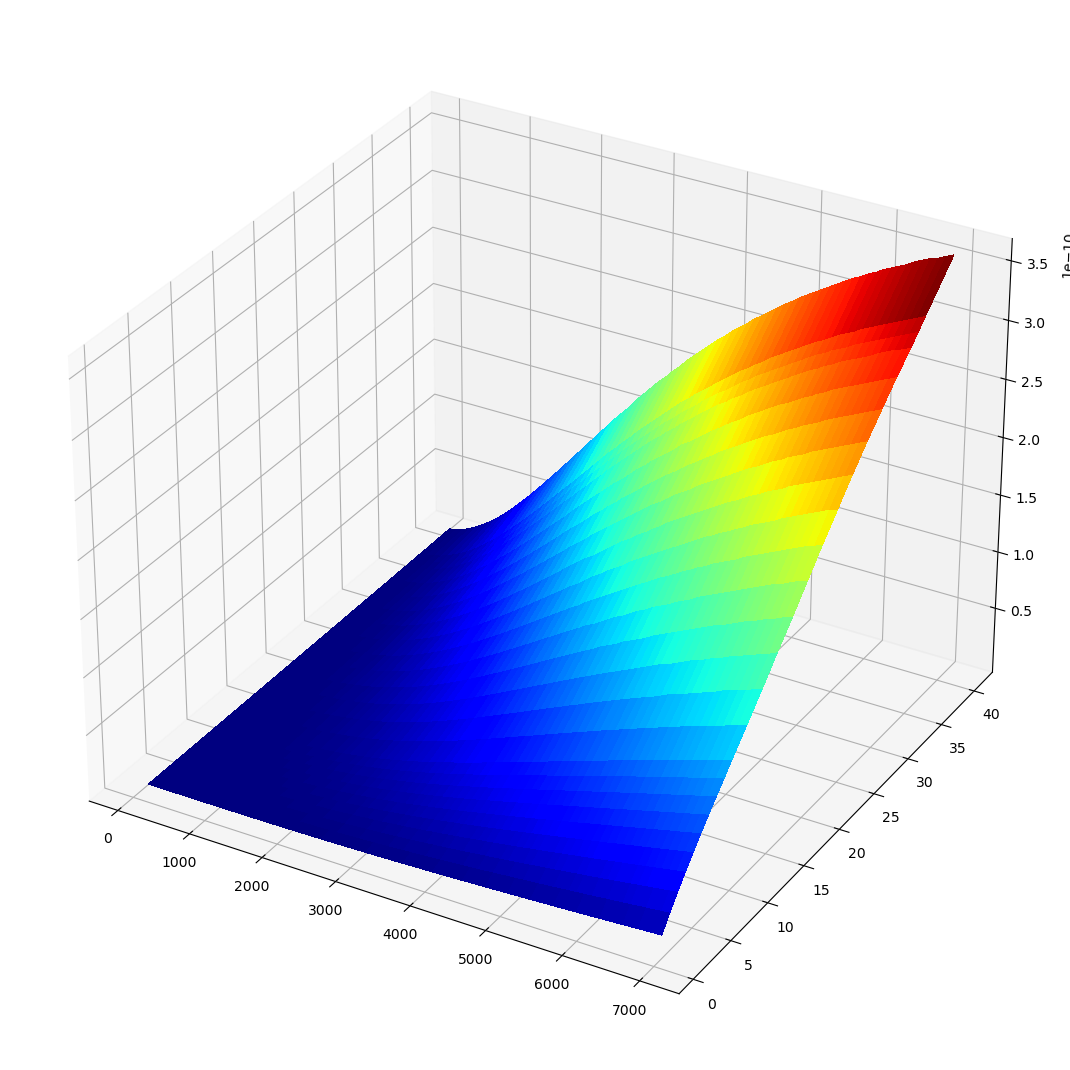

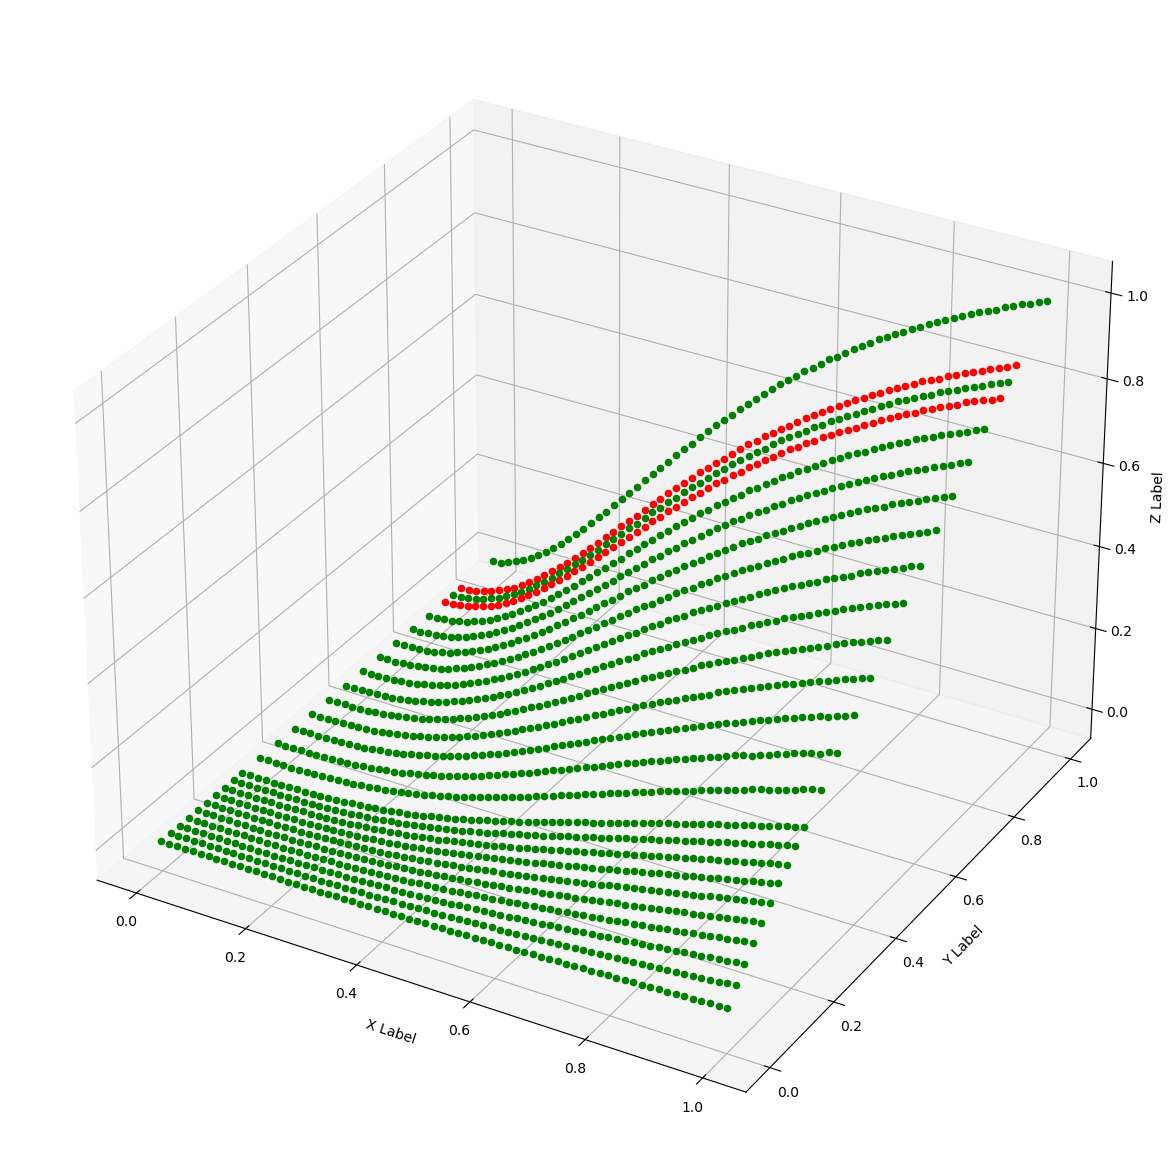

5/5 [==============================] - 0s 6ms/step
Normalized TestSet MSE  [7.6102933e-06]  , TrainSet MSE , [7.670948e-06]
V =  34
T , True Value , Predicted Value
    100.00 ,      34.00 , 1.4000000e-13 , -5.5060508e-13 
    200.00 ,      34.00 , 4.4300000e-13 , -1.8353986e-13 
    300.00 ,      34.00 , 1.2200000e-12 , 1.5517309e-12 
    400.00 ,      34.00 , 2.5000000e-12 , 3.3751407e-12 
    500.00 ,      34.00 , 4.2500000e-12 , 5.2486041e-12 
    600.00 ,      34.00 , 6.4200000e-12 , 7.7024585e-12 
    700.00 ,      34.00 , 9.0400000e-12 , 1.0422184e-11 
    800.00 ,      34.00 , 1.2100000e-11 , 1.3275205e-11 
    900.00 ,      34.00 , 1.5700000e-11 , 1.6691279e-11 
   1000.00 ,      34.00 , 1.9700000e-11 , 2.0839551e-11 
   1100.00 ,      34.00 , 2.4100000e-11 , 2.5301709e-11 
   1200.00 ,      34.00 , 2.8900000e-11 , 2.9998712e-11 
   1300.00 ,      34.00 , 3.3900000e-11 , 3.4976945e-11 
   1400.00 ,      34.00 , 3.9300000e-11 , 3.9975037e-11 
   1500.00 ,      34.00 , 4.4800000

In [41]:
filename = "dv1.xlsx"
df, vib_values , temp_values = cm.filterinitialset (filename)
testsetvib = [34, 36]

compute_and_plot (df, vib_values , temp_values, testsetvib)

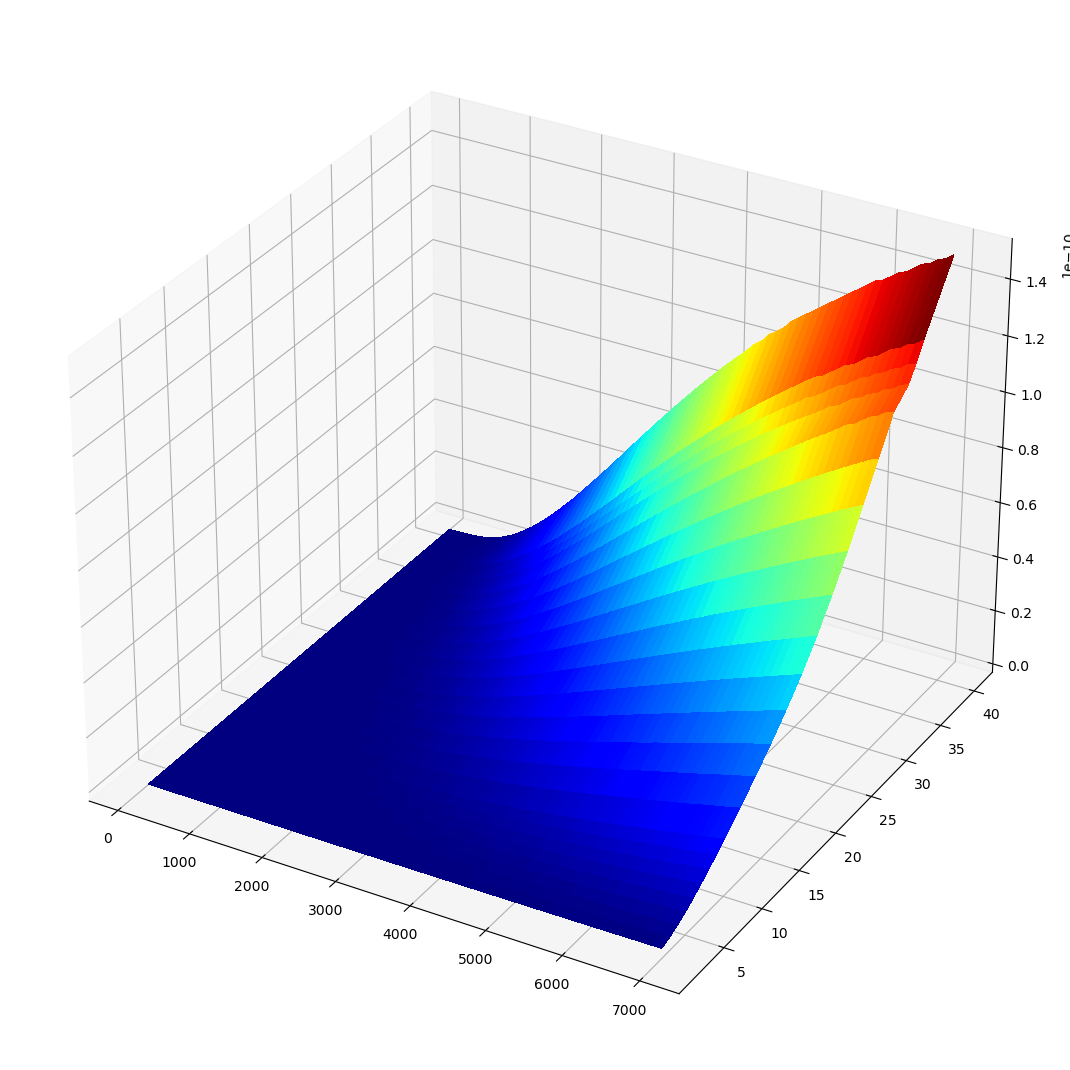

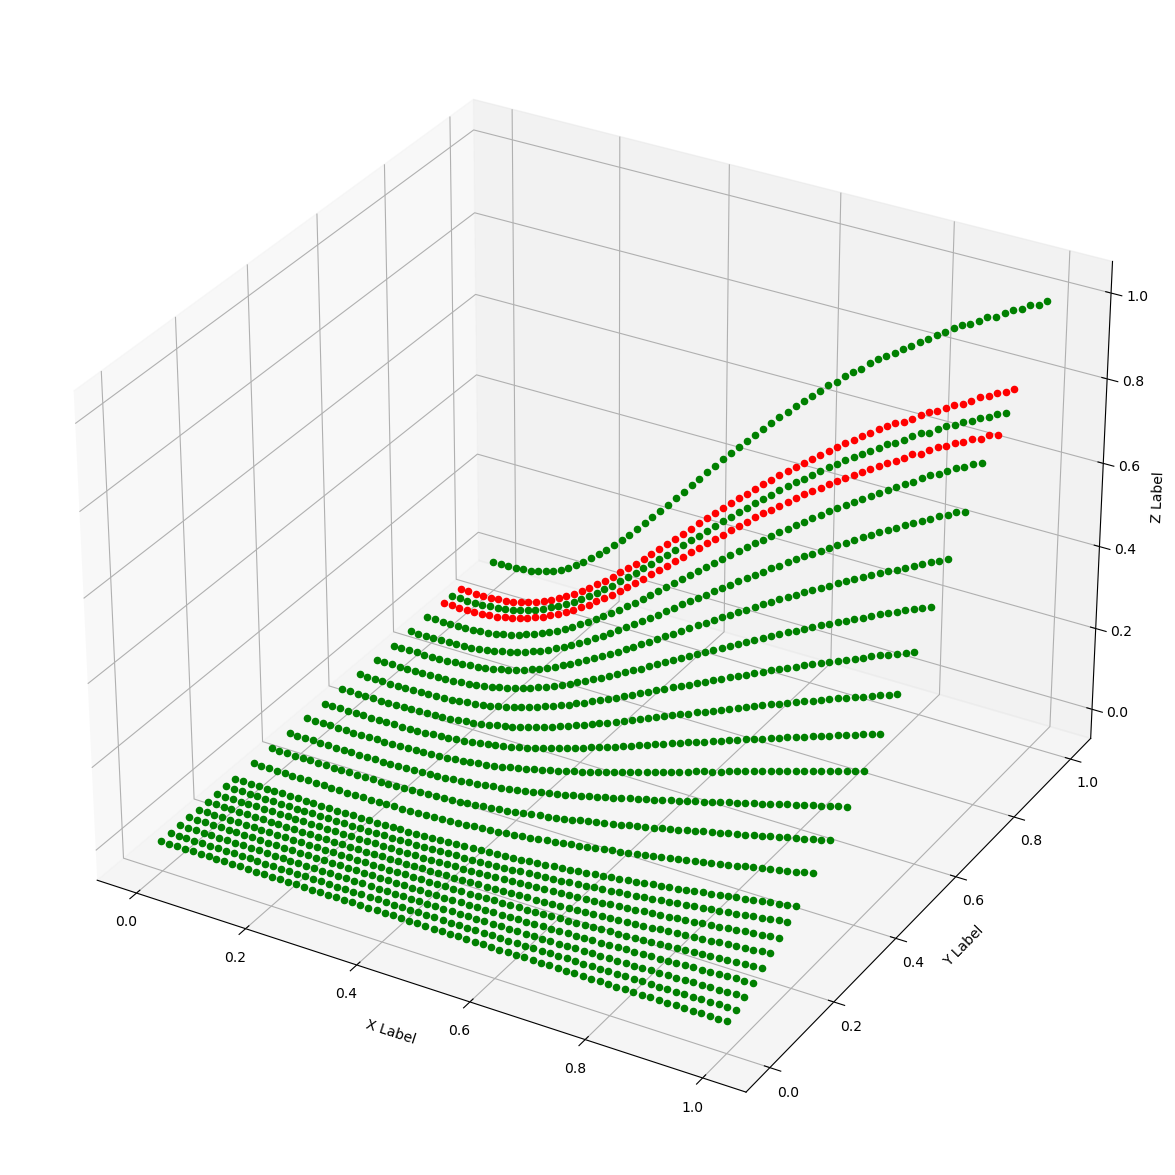

5/5 [==============================] - 0s 9ms/step
Normalized TestSet MSE  [0.00016517]  , TrainSet MSE , [2.1686456e-05]
V =  34
T , True Value , Predicted Value
    100.00 ,      34.00 , 2.0000000e-15 , -1.0552944e-13 
    200.00 ,      34.00 , 1.0500000e-14 , -7.7809632e-14 
    300.00 ,      34.00 , 3.1600000e-14 , 4.9987683e-15 
    400.00 ,      34.00 , 7.2300000e-14 , 1.3729926e-13 
    500.00 ,      34.00 , 1.4800000e-13 , 2.8582451e-13 
    600.00 ,      34.00 , 2.8500000e-13 , 4.3163783e-13 
    700.00 ,      34.00 , 5.1900000e-13 , 6.3362146e-13 
    800.00 ,      34.00 , 8.7700000e-13 , 9.6907508e-13 
    900.00 ,      34.00 , 1.3700000e-12 , 1.3680433e-12 
   1000.00 ,      34.00 , 2.0200000e-12 , 1.8400398e-12 
   1100.00 ,      34.00 , 2.8000000e-12 , 2.4969428e-12 
   1200.00 ,      34.00 , 3.7300000e-12 , 3.3184753e-12 
   1300.00 ,      34.00 , 4.7900000e-12 , 4.5250448e-12 
   1400.00 ,      34.00 , 5.9800000e-12 , 5.7283822e-12 
   1500.00 ,      34.00 , 7.3000000e-

In [42]:
filename = "dv2.xlsx"
df, vib_values , temp_values = cm.filterinitialset (filename)
testsetvib = [34, 36]

compute_and_plot (df, vib_values , temp_values, testsetvib)

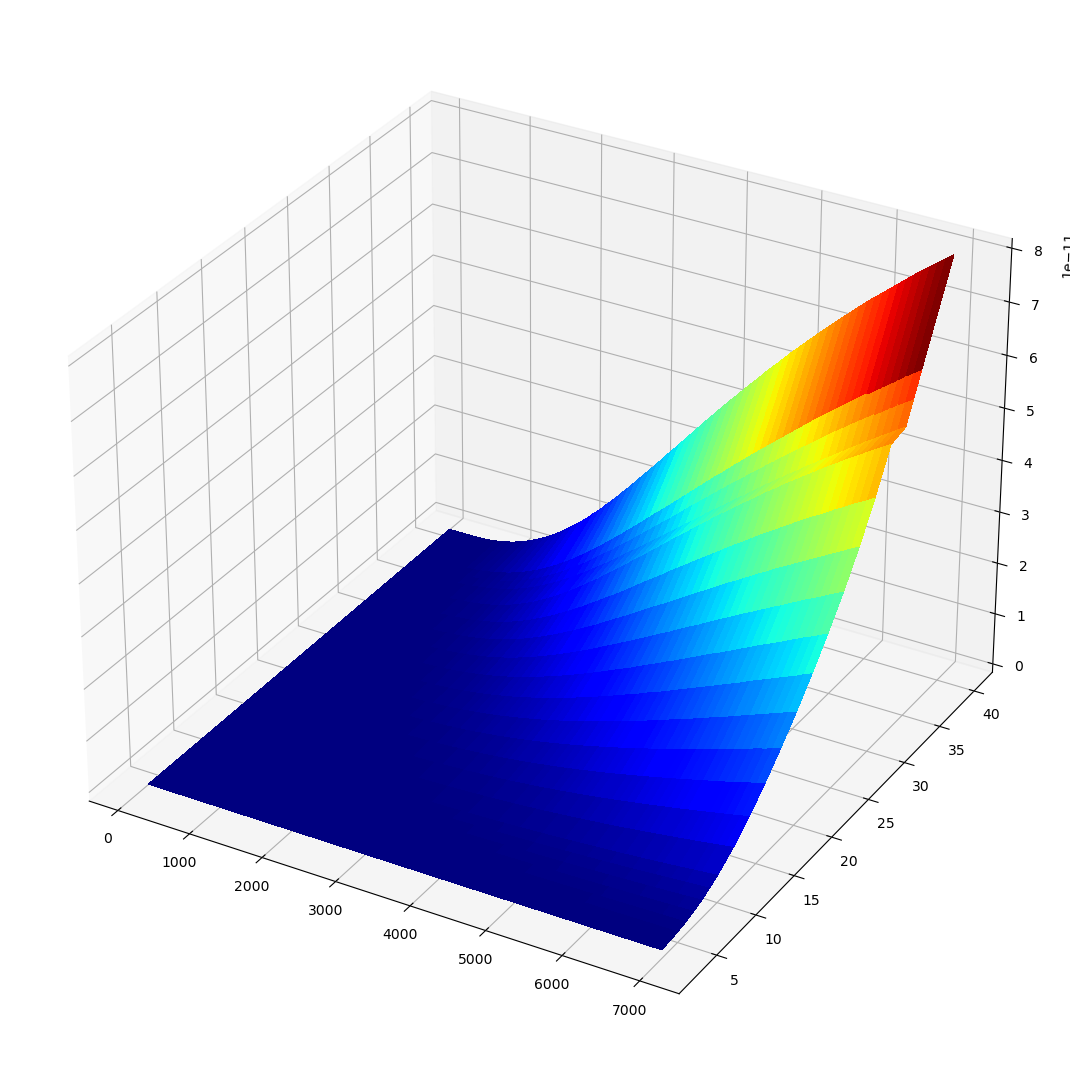

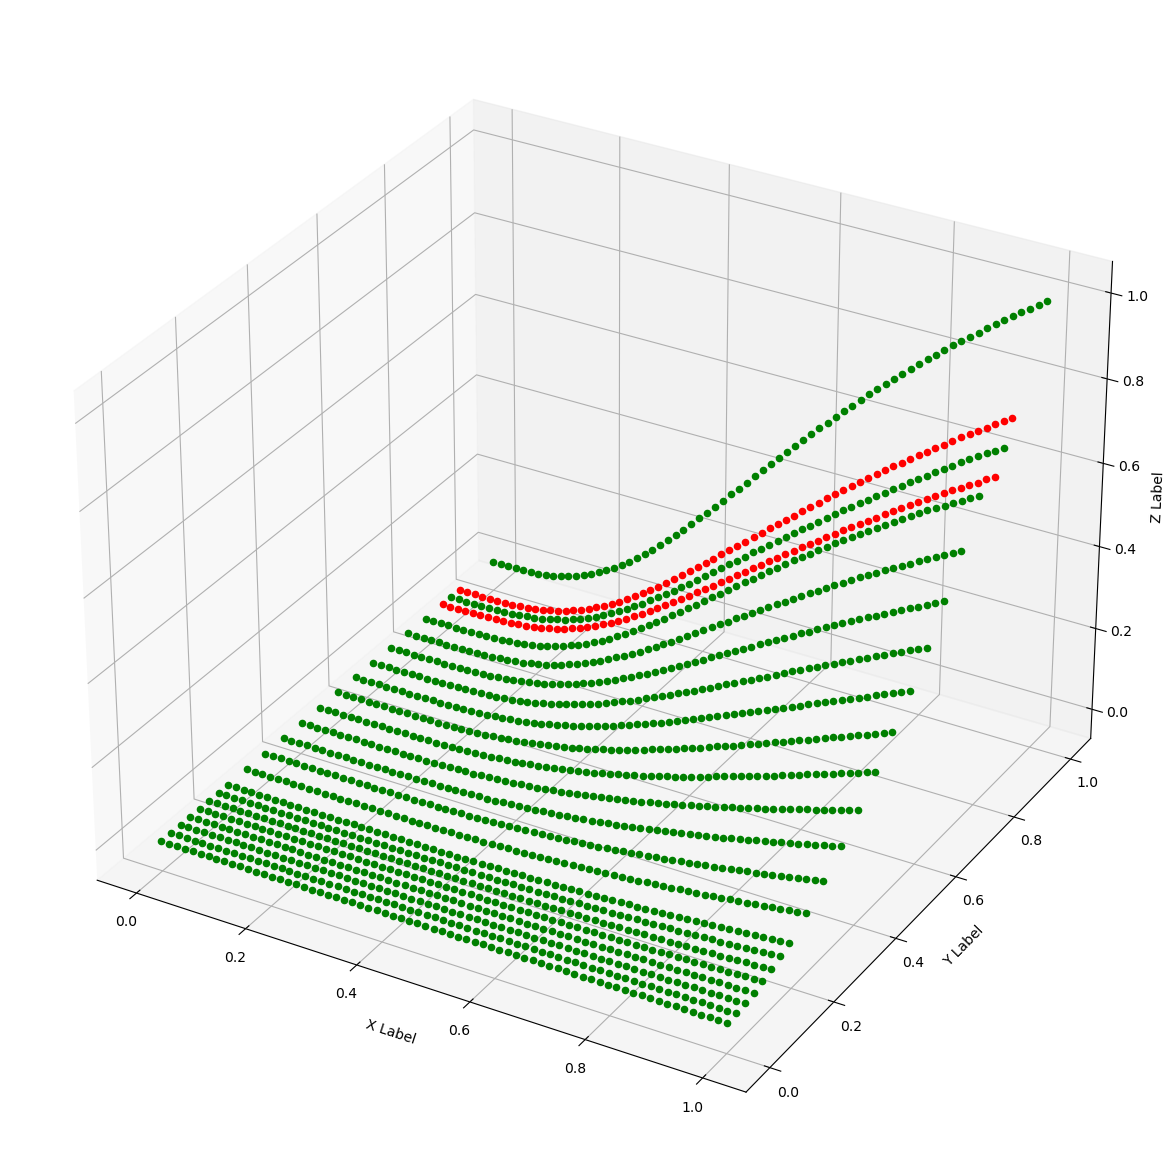

5/5 [==============================] - 0s 4ms/step
Normalized TestSet MSE  [0.00055831]  , TrainSet MSE , [3.979371e-05]
V =  34
T , True Value , Predicted Value
    100.00 ,      34.00 , 9.2800000e-17 , -9.7045761e-16 
    200.00 ,      34.00 , 3.6400000e-16 , 1.2240381e-15 
    300.00 ,      34.00 , 1.2800000e-15 , 5.0132166e-15 
    400.00 ,      34.00 , 4.0200000e-15 , 2.0159301e-14 
    500.00 ,      34.00 , 1.2300000e-14 , 5.0011390e-14 
    600.00 ,      34.00 , 3.2500000e-14 , 8.4650420e-14 
    700.00 ,      34.00 , 7.1100000e-14 , 1.1152316e-13 
    800.00 ,      34.00 , 1.3300000e-13 , 1.3375055e-13 
    900.00 ,      34.00 , 2.2200000e-13 , 1.3301881e-13 
   1000.00 ,      34.00 , 3.4100000e-13 , 1.9550632e-13 
   1100.00 ,      34.00 , 4.9300000e-13 , 4.0849979e-13 
   1200.00 ,      34.00 , 6.8300000e-13 , 6.6630886e-13 
   1300.00 ,      34.00 , 9.1600000e-13 , 9.3885295e-13 
   1400.00 ,      34.00 , 1.2000000e-12 , 1.3109881e-12 
   1500.00 ,      34.00 , 1.5300000e-12

In [43]:
filename = "dv3.xlsx"
df, vib_values , temp_values = cm.filterinitialset (filename)
testsetvib = [34, 36]

compute_and_plot (df, vib_values , temp_values, testsetvib)